In [18]:
import pandas as pd
df = pd.read_csv("homework.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  546 non-null    int64 
 1   price     546 non-null    int64 
 2   lotsize   546 non-null    int64 
 3   bedrooms  546 non-null    int64 
 4   bathrms   546 non-null    int64 
 5   stories   546 non-null    int64 
 6   driveway  546 non-null    object
 7   recroom   546 non-null    object
 8   fullbase  546 non-null    object
 9   gashw     546 non-null    object
 10  airco     546 non-null    object
 11  garagepl  546 non-null    int64 
 12  prefarea  546 non-null    object
dtypes: int64(7), object(6)
memory usage: 55.6+ KB


1/ Simple Linear Regression

Simple Linear Regression:
Slope: 6.885408879999409
Intercept: 33003.36216890106
R²: 0.18583856088525563
MSE: 543921224.559349


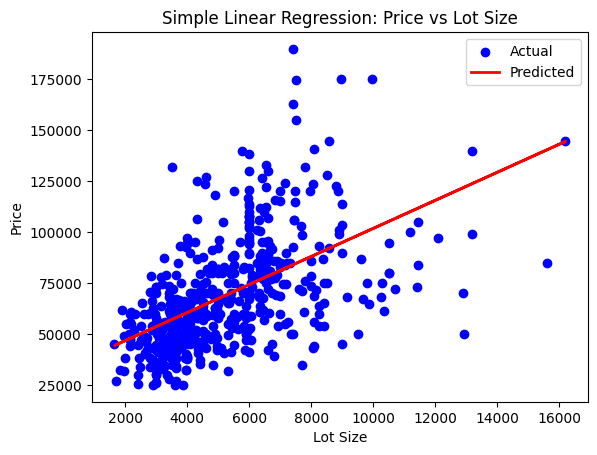

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

X = df[['lotsize']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_pred = slr.predict(X_test)

print("Simple Linear Regression:")
print("Slope:", slr.coef_[0])
print("Intercept:", slr.intercept_)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, slr.predict(X), color='red', linewidth=2, label='Predicted')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Lot Size')
plt.legend()
plt.show()


2/ Multiple Linear Regression


Multiple Linear Regression:
Intercept: -686.0926900044869
lotsize: 4.821947680818953
bedrooms: 1932.909125941229
bathrms: 15571.0082774783
stories: 8058.99388421814
garagepl: 5870.76227439857
R²: 0.5079874949829704
MSE: 328701448.3495563


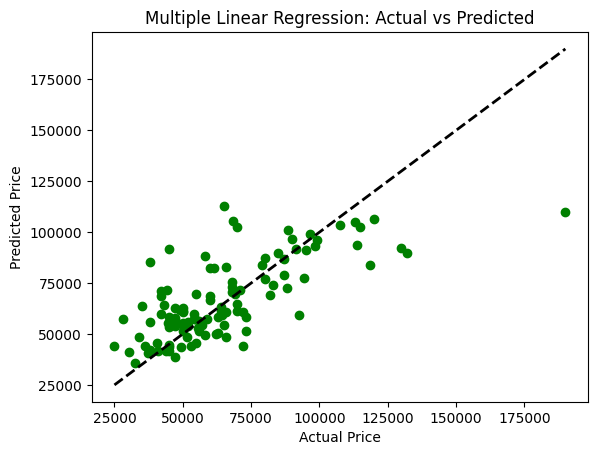

In [16]:
features = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']
X_multi = df[features]
y = df['price']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train_m, y_train_m)

y_pred_m = mlr.predict(X_test_m)

print("\nMultiple Linear Regression:")
print("Intercept:", mlr.intercept_)
for f, coef in zip(features, mlr.coef_):
    print(f"{f}: {coef}")

print("R²:", r2_score(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))

plt.scatter(y_test_m, y_pred_m, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()
